# Jessica Luo  

## Does time of response influence the mental health survey submissions?

I am interested to see how time of survey response influences respondent's survey submissions. In particular, I am interested in whether self-reported mental health, music preferences, or other characteristics change overtime or by time of day.

In [1]:
import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## 1. Loading Dataset

Below, the dataset is loaded and we can see the first few columns to get an understanding of the dataset.

In [2]:
mxmh = pd.read_csv('../../data/raw/mxmh_survey_results.csv', parse_dates=['Timestamp'])

In [3]:
mxmh.head(7)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


## 2. Data Cleaning

Given our research question, we may not need all columns.

The `Permissions` seems to be irrelevent here - let's check.

In [4]:
mxmh['Permissions'].nunique()

1

In [5]:
mxmh['Permissions'].unique()

array(['I understand.'], dtype=object)

In [6]:
mxmh[['Permissions']].isnull().sum()

Permissions    0
dtype: int64

Since there is only one value, and no one failed to provide their permission, I will keep all entries but remove this column.

For this research question, I also want to divide `Timestamp` into `Date` and `Time` to see if there are any periodic patterns.

In [7]:
mxmh["Timestamp"] = pd.to_datetime(mxmh["Timestamp"])

# Extract Date and Time
mxmh["Date"] = pd.to_datetime(mxmh["Timestamp"].dt.date)
mxmh["Time"] = mxmh["Timestamp"].dt.strftime("%H:%M:%S")

# Drop original Timestamp column
mxmh_clean = mxmh.drop(columns=["Permissions"])

In [8]:
mxmh_clean.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Date,Time
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,2022-08-27,19:29:02
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,2022-08-27,19:57:31
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,2022-08-27,21:28:18
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,2022-08-27,21:40:40
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,2022-08-27,21:54:47


## 3. Exploratory Data Analysis (EDA)

### *General EDA*

In [9]:
mxmh.shape

(736, 35)

In [10]:
mxmh_clean.shape

(736, 34)

In [11]:
mxmh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             732 non-null    object        
 10  BPM                           629 non-null    float64       
 11  Frequency [Classical]         73

There are a handful of columns with missing values, and importantly, not everyone answered `Music effects`: *"The effect that music has on the respondent's mental health conditions"*
Columns 11 to 26 are all frequencies of a music genre, each of which do not have missing counts.

In [12]:
mxmh_clean.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [13]:
mxmh_clean.describe()

,Timestamp,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Date
count,736,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000,736
mean,2022-09-03 19:54:51.849184768,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228,2022-09-03 05:56:05.217391104
min,2022-08-27 19:29:02,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2022-08-27 00:00:00
25%,2022-08-28 19:58:27.249999872,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000,2022-08-28 00:00:00
50%,2022-08-29 13:41:45.500000,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000,2022-08-29 00:00:00
75%,2022-09-03 17:26:35.500000,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000,2022-09-03 00:00:00
max,2022-11-09 01:55:20,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000,2022-11-09 00:00:00
std,NaN,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017,NaN


Blah blah blah


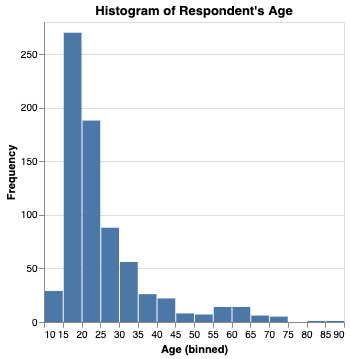

In [15]:
age_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.X('Age', bin=alt.BinParams(maxbins=30), title='Age (binned)'),
            alt.Y('count()', title='Frequency')
).properties(title="Histogram of Respondent's Age")
age_dist

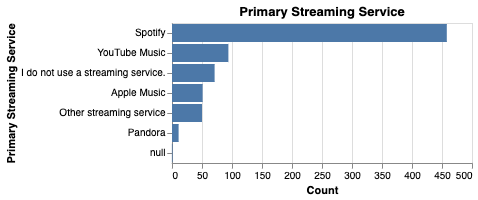

In [16]:
pss_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Primary streaming service', title='Primary Streaming Service', sort='-x'),
            alt.X('count()', title='Count')
).properties(title='Primary Streaming Service')
pss_dist

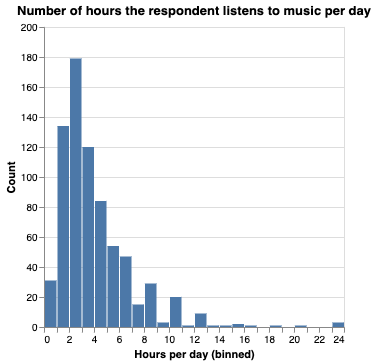

In [17]:
hours_dist = alt.Chart(mxmh).mark_bar().encode(
    alt.X('Hours per day:Q',  bin=alt.BinParams(maxbins=30), title='Hours per day (binned)'),
    alt.Y('count():Q', title='Count', scale=alt.Scale(domain=[0,200]))
).properties(title='Number of hours the respondent listens to music per day')
hours_dist

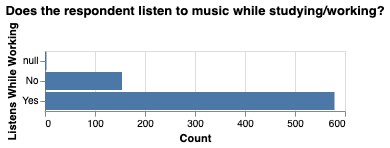

In [18]:
ww_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('While working', title='Listens While Working'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent listen to music while studying/working?')
ww_dist

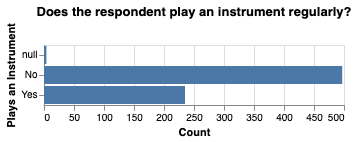

In [19]:
instru_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Instrumentalist', title='Plays an Instrument'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent play an instrument regularly?')
instru_dist

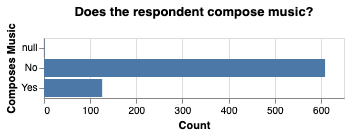

In [20]:
composer_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Composer', title='Composes Music'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent compose music?')
composer_dist

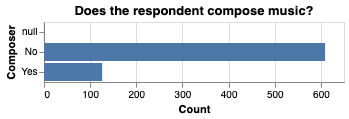

In [21]:
composer_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Composer', title='Composer'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent compose music?')
composer_dist

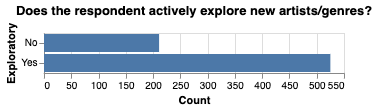

In [23]:
explore_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Exploratory', title='Exploratory'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent actively explore new artists/genres?')
explore_dist



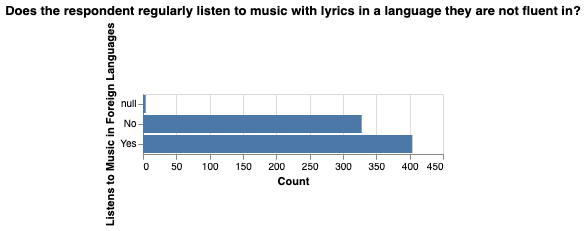

In [26]:
foreign_lang_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Foreign languages', title='Listens to Music in Foreign Languages'),
            alt.X('count()', title='Count')
).properties(title='Does the respondent regularly listen to music with lyrics in a language they are not fluent in?')
foreign_lang_dist

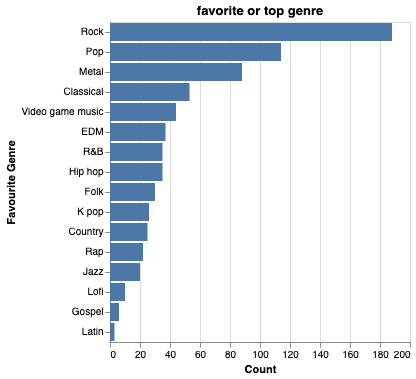

In [29]:
fav_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Fav genre', sort="-x", title='Favourite Genre'),
            alt.X('count()', title='Count')
).properties(title='favorite or top genre')
fav_dist

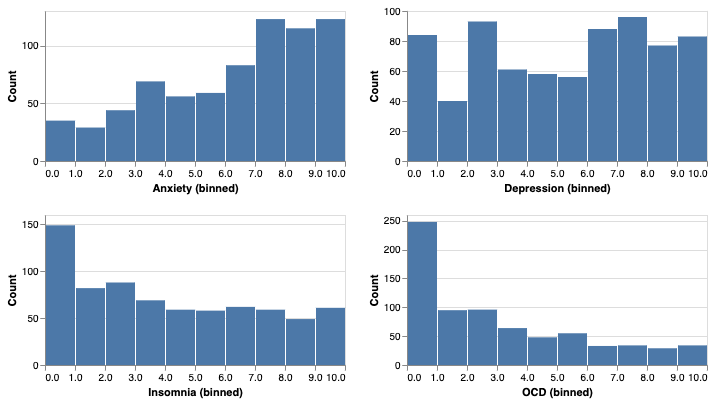

In [30]:
mho_dist = alt.Chart(mxmh).mark_bar().encode(
                     alt.X(alt.repeat(), bin=alt.BinParams(maxbins=15), type = 'quantitative'),
                    alt.Y('count():Q', title='Count')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
mho_dist

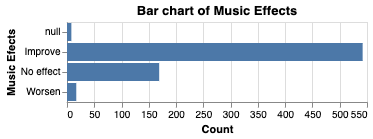

In [31]:
music_effects_dist = alt.Chart(mxmh).mark_bar().encode(
            alt.Y('Music effects', title='Music Efects'),
            alt.X('count()', title='Count')
).properties(title='Bar chart of Music Effects')
music_effects_dist

### *`Timestamp` Specific EDA*

Since we are interested in how the Time of Survey Response (Timestamp) effects the survey responses, we want to know what the range is for the `Timestamp` column.

In [32]:
mxmh["Timestamp"].min()

Timestamp('2022-08-27 19:29:02')

In [33]:
mxmh["Timestamp"].max()

Timestamp('2022-11-09 01:55:20')

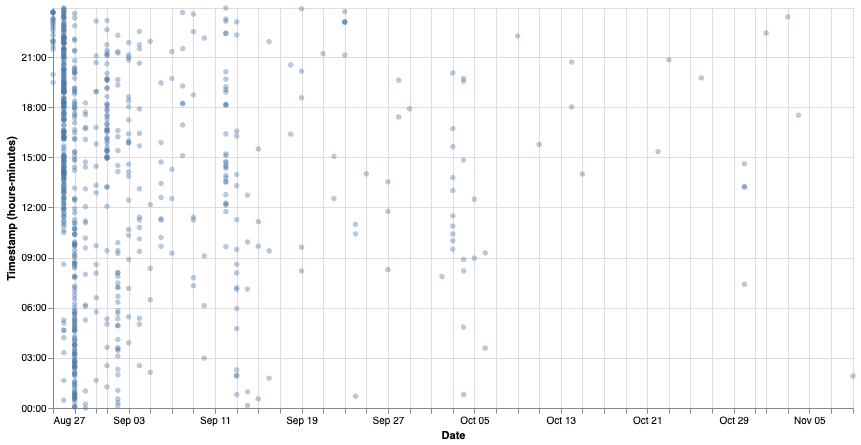

In [34]:
date_vs_time = alt.Chart(mxmh_clean).mark_circle(opacity=.40).encode(
    alt.Y("hoursminutes(Timestamp):T").axis(format="%H:%M"),
    alt.X("Date:T").axis(format="%b %d")
).properties(width=800, height=400)

date_vs_time

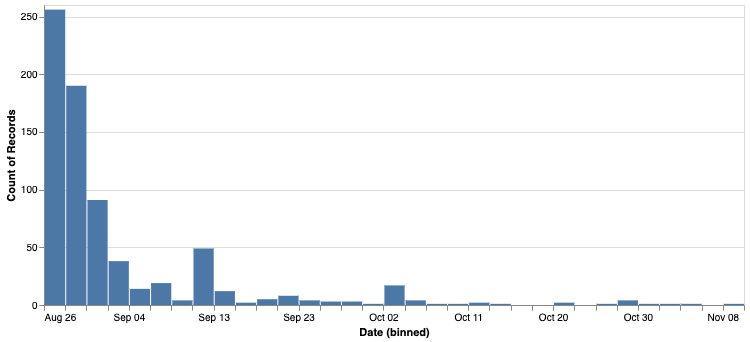

In [35]:
date_dist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.X("Date:T", bin=alt.BinParams(maxbins=40)).axis(format='%b %d'),
    alt.Y("count()")
).transform_timeunit(
    Date='monthdate(Date)'
).properties(width=700)

date_dist

Looks like most respondents filled out this survey around late August.

Here, the graph shows...

In [36]:
time_order = ["Morning", "Afternoon", "Evening", "Night"]

def categorize_time_of_day(timestamp):
    hour = timestamp.hour
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

# Apply time of day categorization
mxmh_clean["Time of Day"] = mxmh_clean["Timestamp"].apply(categorize_time_of_day)

# Convert to categorical type with order
mxmh_clean["Time of Day"] = pd.Categorical(mxmh_clean["Time of Day"], categories=time_order, ordered=True)

In [37]:
mxmh_clean.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Date,Time,Time of Day
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,2022-08-27,19:29:02,Evening
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,2022-08-27,19:57:31,Evening
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,2022-08-27,21:28:18,Evening
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,9.0,7.0,3.0,3.0,Improve,2022-08-27,21:40:40,Evening
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Never,Rarely,7.0,2.0,5.0,9.0,Improve,2022-08-27,21:54:47,Evening


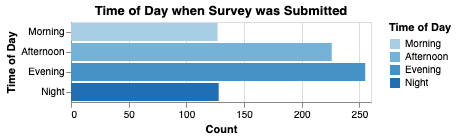

In [38]:
tod_hist = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y("Time of Day:O", title="Time of Day", sort=time_order),
    alt.X("count()", title="Count"),
    alt.Color("Time of Day:O", sort=time_order),
    tooltip=["count()"],
).properties(title="Time of Day when Survey was Submitted")
tod_hist

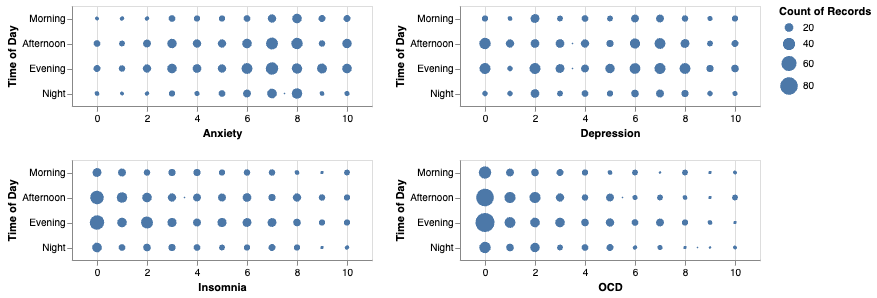

In [44]:
tod_mh = alt.Chart(mxmh_clean).mark_circle().encode(
    alt.Y('Time of Day:O', title="Time of Day", sort=time_order),
    alt.X(alt.repeat(), type='quantitative', scale=alt.Scale(domain=[-1,11])),
    alt.Size("count()"),
    tooltip=alt.Tooltip(["count()"])
).properties(
    height=100, width=300
).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
tod_mh

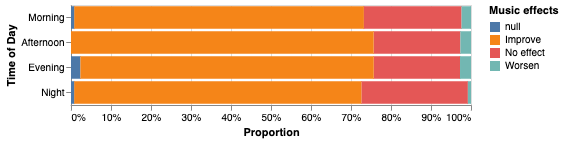

In [58]:
tod_effects = alt.Chart(mxmh_clean).mark_bar().encode(
    alt.Y('Time of Day:O', title="Time of Day", sort=time_order),
    alt.X("count()", title="Proportion").stack("normalize"),
    alt.Color("Music effects"),
    tooltip=alt.Tooltip(["count()"])
).properties(
    height=100, width=400
)

tod_effects